In [20]:
import trusspy as tp
import networkx as nx
import itertools
import math
from numpy import random
%matplotlib inline
import matplotlib.pyplot as plt
#matplotlib widget
from mpl_toolkits.mplot3d import Axes3D

# init model
M = tp.Model(logfile=True)

In [21]:

a = [tuple((round(10*random.random()), round(10*random.random()), layer)) for layer in [0, 5, 10] for _ in range(round(random.normal(7,2)))]
a

[(2, 2, 0),
 (1, 4, 0),
 (8, 10, 0),
 (9, 3, 0),
 (4, 1, 0),
 (9, 5, 0),
 (5, 4, 0),
 (8, 7, 0),
 (8, 1, 0),
 (4, 1, 5),
 (7, 6, 5),
 (9, 5, 5),
 (4, 4, 5),
 (1, 2, 10),
 (8, 6, 10),
 (3, 2, 10),
 (4, 2, 10),
 (6, 5, 10),
 (9, 9, 10),
 (5, 3, 10),
 (8, 1, 10)]

In [22]:
potential_edges = itertools.combinations(a,2)
potential_edges = list(potential_edges)
G = nx.Graph()
G.add_nodes_from(a)
pos = dict(zip(a,a))
for i in potential_edges:
    length = math.sqrt((i[0][0] - i[1][0])**2 + (i[0][1] - i[1][1])**2 + (i[0][2] - i[1][2])**2)
    print(length)
    if length < 8 and random.random() >= 0:
        G.add_edge(i[0], i[1])
        print(i[0])
        print(i[1])
        print("------")
nx.is_connected(G)

True

In [23]:
list(G.edges())[1]

((2, 2, 0), (9, 3, 0))

In [24]:
list(G.edges())

[((2, 2, 0), (1, 4, 0)),
 ((2, 2, 0), (9, 3, 0)),
 ((2, 2, 0), (4, 1, 0)),
 ((2, 2, 0), (9, 5, 0)),
 ((2, 2, 0), (5, 4, 0)),
 ((2, 2, 0), (8, 7, 0)),
 ((2, 2, 0), (8, 1, 0)),
 ((2, 2, 0), (4, 1, 5)),
 ((2, 2, 0), (4, 4, 5)),
 ((1, 4, 0), (4, 1, 0)),
 ((1, 4, 0), (5, 4, 0)),
 ((1, 4, 0), (8, 7, 0)),
 ((1, 4, 0), (8, 1, 0)),
 ((1, 4, 0), (4, 1, 5)),
 ((1, 4, 0), (4, 4, 5)),
 ((8, 10, 0), (9, 3, 0)),
 ((8, 10, 0), (9, 5, 0)),
 ((8, 10, 0), (5, 4, 0)),
 ((8, 10, 0), (8, 7, 0)),
 ((8, 10, 0), (7, 6, 5)),
 ((8, 10, 0), (9, 5, 5)),
 ((9, 3, 0), (4, 1, 0)),
 ((9, 3, 0), (9, 5, 0)),
 ((9, 3, 0), (5, 4, 0)),
 ((9, 3, 0), (8, 7, 0)),
 ((9, 3, 0), (8, 1, 0)),
 ((9, 3, 0), (4, 1, 5)),
 ((9, 3, 0), (7, 6, 5)),
 ((9, 3, 0), (9, 5, 5)),
 ((9, 3, 0), (4, 4, 5)),
 ((4, 1, 0), (9, 5, 0)),
 ((4, 1, 0), (5, 4, 0)),
 ((4, 1, 0), (8, 7, 0)),
 ((4, 1, 0), (8, 1, 0)),
 ((4, 1, 0), (4, 1, 5)),
 ((4, 1, 0), (7, 6, 5)),
 ((4, 1, 0), (4, 4, 5)),
 ((9, 5, 0), (5, 4, 0)),
 ((9, 5, 0), (8, 7, 0)),
 ((9, 5, 0), (8, 1,

In [51]:
list(G.degree())

[((2, 2, 0), 9),
 ((1, 4, 0), 7),
 ((8, 10, 0), 6),
 ((9, 3, 0), 11),
 ((4, 1, 0), 10),
 ((9, 5, 0), 10),
 ((5, 4, 0), 12),
 ((8, 7, 0), 11),
 ((8, 1, 0), 11),
 ((4, 1, 5), 15),
 ((7, 6, 5), 17),
 ((9, 5, 5), 15),
 ((4, 4, 5), 18),
 ((1, 2, 10), 7),
 ((8, 6, 10), 9),
 ((3, 2, 10), 9),
 ((4, 2, 10), 10),
 ((6, 5, 10), 11),
 ((9, 9, 10), 5),
 ((5, 3, 10), 11),
 ((8, 1, 10), 10)]

In [52]:
a.index(list(G.edges())[16][1])

5

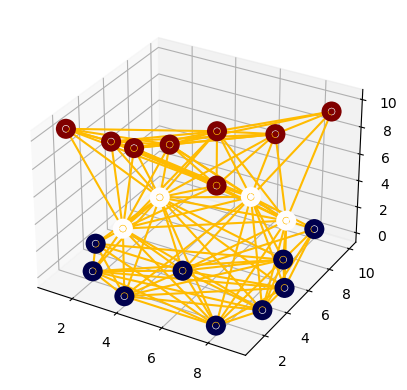

In [53]:
x, y, z = zip(*list(G.nodes()))
fig = plt.figure()
ax = fig.add_subplot(111, projection="3d")
ax.scatter(x, y, z, c=z, cmap='seismic', linewidths=10, alpha=1)
for edge in list(G.edges()):
    x_ed, y_ed, z_ed = zip(*list(edge))
    ax.plot(x_ed,y_ed,z_ed, c="#FFBB00")
plt.show()

In [54]:
with M.Nodes as MN:
    for i in range(len(a)):
        MN.add_node( i+1, coord=a[i])

In [55]:
element_type   = 1    # truss
material_type  = 1    # linear-elastic

youngs_modulus = 4*10**9
cross_section_area = math.pi*(1.25*10**(-3))**2

with M.Elements as ME:
    for i in range(len(list(G.edges()))):
        ME.add_element( i+1, conn=(a.index(list(G.edges())[i][0])+1,a.index(list(G.edges())[i][1])+1) )
    ME.assign_etype("all", element_type)
    ME.assign_mtype("all", material_type)
    ME.assign_material("all", [youngs_modulus])
    ME.assign_geometry("all", [cross_section_area])

In [56]:
with M.Boundaries as MB:
    for i in range(len(a)):
        if a[i][2]==0:
            MB.add_bound_U( i+1, (0,0,0) )
    else: MB.add_bound_U( i+1, (1,1,1) )
    
with M.ExtForces as MF:
     for i in range(len(a)):
        if a[i][2]==10:
             MF.add_force( i+1, ( 0, 0,-1) )
        else:MF.add_force( i+1, ( 0, 0,0) )
   

In [57]:
M.Settings.dlpf = 0.005
M.Settings.du = 0.05
M.Settings.incs = 1

In [58]:
M.Settings.stepcontrol = True
M.Settings.maxfac = 4

M.Settings.ftol = 8
M.Settings.xtol = 8
M.Settings.nfev = 8

M.Settings.dxtol = 1.25

In [59]:
M.build()
M.run()

ValueError: operands could not be broadcast together with shapes (42,) (31,) 

In [60]:
# undeformed views
fig, ax = M.plot_model(
    view="3d",  # 'xy', 'yz', 'xz'
    contour="force",
    lim_scale=(0, 10, 0, 10, 0, 10),  # 3d
    # lim_scale=1.4, # plane-view
    force_scale=5.0,  # 2
    inc=0,
)
plt.show()
fig.savefig("model_undeformed_inc0_3d.pdf")
fig.savefig("model_undeformed_inc0_3d.png")

IndexError: list index out of range

<Figure size 640x480 with 0 Axes>

In [61]:
fig, ax = M.plot_model(
    view="xz", contour="force", lim_scale=1.3, force_scale=5.0, inc=0
)

fig, ax = M.plot_model(view="yz",contour="force",lim_scale=1.3,force_scale=5.0,inc=0
)
plt.show

IndexError: list index out of range

<Figure size 640x480 with 0 Axes>

In [49]:
max(M.Results.R[-1].element_force)[0]*10e2

4.3131094722519006

In [44]:
max(abs(M.Results.R[0].element_force))

array([0.])